# Cross-validation

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# read the data
train_data = pd.read_csv('./train.csv', index_col='Id')
test_data = pd.read_csv('./test.csv', index_col='Id')

# remove rows with missing target
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

# separate target from predictors
y = train_data.SalePrice
train_data.drop(['SalePrice'], axis=1, inplace=True)

# select numeric columns only
numeric_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]
X_train = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [24]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


### Simplw pipleline  

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipeline = Pipeline(steps=[
  ('preprocessor', SimpleImputer()),
  ('model', RandomForestRegressor(n_estimators=100, random_state=0))  
])

### Apply cross-validation 

In [26]:
from sklearn.model_selection import cross_val_score

scores = -1 * cross_val_score(pipeline, X_train, y, cv=5, scoring='neg_mean_absolute_error')

print(f"Scores: {scores}")
print(f"Average MAE: {scores.mean()}")

Scores: [18399.62520548 17634.81126712 18090.10332192 16277.4277968
 19872.92921233]
Average MAE: 18054.97936073059


In [27]:
def get_score(n_estimator):
  pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer(strategy='median')),
    ('model', RandomForestRegressor(n_estimators=n_estimator, random_state=0))  
  ])
  scores = -1 * cross_val_score(pipeline, X_train, y, cv=5, scoring='neg_mean_absolute_error')
  return scores.mean()

In [28]:
import numpy as np

n_estimators = np.arange(50, 401, 50)
# scores = list(map(lambda n_estimator: get_score(n_estimator), n_estimators))
scores = [get_score(n_estimator) for n_estimator in n_estimators]

In [29]:
scores

[18315.918315068495,
 18021.353223744292,
 17965.27928614916,
 17924.650562785388,
 17939.341962165687,
 17933.44204990215,
 17931.782185257664,
 17941.801888698632]

In [30]:
results = dict(zip(n_estimators, scores))

In [31]:
results

{50: 18315.918315068495,
 100: 18021.353223744292,
 150: 17965.27928614916,
 200: 17924.650562785388,
 250: 17939.341962165687,
 300: 17933.44204990215,
 350: 17931.782185257664,
 400: 17941.801888698632}

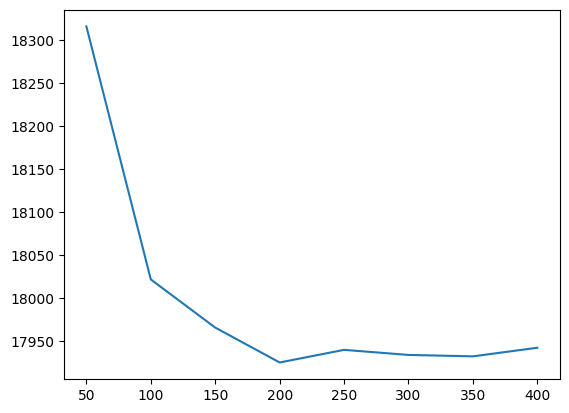

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [33]:
best_n_estimator = list(results.keys())[list(results.values()).index(min(list(results.values())))]

In [34]:
best_n_estimator

200